<a href="https://colab.research.google.com/github/BrianKipngeno/Bayes-theorem-iris-classification/blob/main/WK4_THUR_Python_Programming_Bayes_Theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: Bayes Theorem

The Bayes Theorem is applicable in machine learning where we get to use a Bayes classifier inorder to make a prediction. In this session, we will learn how to apply this classifer to a few machine learning problems even though later during Core we will spent time exhaustively on working on such problems. While working, we should note that the bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. 

For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.

Such classifiers, Naive Bayes classifiers, are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.


## Example 

In [29]:
# Example 1
# ---
# Let's see an overview on how this classifier works, which suitable applications it has, 
# and how to use it in just a few lines of Python and the Scikit-Learn library.
# ---
# Question: Build a very simple SPAM detector for SMS messages given the following dataset; 
# ---
# Dataset source = https://archive.ics.uci.edu/ml/datasets/sms+spam+collection
#


In [7]:
# Importing our library
# ---
#
import pandas as pd

import numpy as np

In [15]:
# Loading our uploaded Data
# ---
# We define a separator (in this case, a tab) and rename the columns accordingly
# 
df = pd.read_csv("/content/SMSSpamCollection", sep='\t', header=None, names=['label', 'message'], encoding='latin-1')
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.shape

(5572, 2)

In [18]:
# Pre-processing
# ---
# 1. Converting the labels from strings to binary values for our classifier
# 
df['label'] = df.label.map({'ham': 0, 'spam': 1})
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# Pre-processing
# ---
# 2. Converting all characters in the message to lower case:
# 
df['message'] = df.message.map(lambda x: x.lower())
df.head()

,label,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [20]:
# Pre-processing
# ---
# 3. Remove any punctuation:
# 
df['message'] = df.message.str.replace('[^\w\s]', '')
df.head()

,label,message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


In [21]:
# Pre-processing
# ---
# 4. tokenize the messages into into single words using nltk. 
# First, we have to import and download the tokenizer from the console:
# 
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [22]:
# Pre-processing
# ---
# 5. Applying the tokenization. 
# What is tokenization (http://bit.ly/WhatisTokenization)
# 
df['message'] = df['message'].apply(nltk.word_tokenize)
df.head()

,label,message
0,0,"[go, until, jurong, point, crazy, available, o..."
1,0,"[ok, lar, joking, wif, u, oni]"
2,1,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,"[u, dun, say, so, early, hor, u, c, already, t..."
4,0,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [23]:
# Pre-processing
# ---
# 6. We then perform some word stemming. 
# The idea of stemming is to normalize our text for all variations of words carry the same meaning, 
# regardless of the tense. One of the most popular stemming algorithms is the Porter Stemmer:
# 
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
 
df['message'] = df['message'].apply(lambda x: [stemmer.stem(y) for y in x])
df.head()

,label,message
0,0,"[go, until, jurong, point, crazi, avail, onli,..."
1,0,"[ok, lar, joke, wif, u, oni]"
2,1,"[free, entri, in, 2, a, wkli, comp, to, win, f..."
3,0,"[u, dun, say, so, earli, hor, u, c, alreadi, t..."
4,0,"[nah, i, dont, think, he, goe, to, usf, he, li..."


In [24]:
# Pre-processing
# ---
# 7. We will transform the data into occurrences, 
# which will be the features that we will feed into our model:
#
from sklearn.feature_extraction.text import CountVectorizer

# This converts the list of words into space-separated strings
df['message'] = df['message'].apply(lambda x: ' '.join(x))

count_vect = CountVectorizer()
counts = count_vect.fit_transform(df['message'])
df.head()

,label,message
0,0,go until jurong point crazi avail onli in bugi...
1,0,ok lar joke wif u oni
2,1,free entri in 2 a wkli comp to win fa cup fina...
3,0,u dun say so earli hor u c alreadi then say
4,0,nah i dont think he goe to usf he live around ...


In [25]:
# Pre-processing
# ---
# 8. We could leave it as the simple word-count per message, 
# but it is better to use Term Frequency Inverse Document Frequency, more known as tf-idf:
#
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer().fit(counts)

counts = transformer.transform(counts)
df.head()

,label,message
0,0,go until jurong point crazi avail onli in bugi...
1,0,ok lar joke wif u oni
2,1,free entri in 2 a wkli comp to win fa cup fina...
3,0,u dun say so earli hor u c alreadi then say
4,0,nah i dont think he goe to usf he live around ...


In [26]:
# Training the Model
# ---
# Now that we have performed feature extraction from our data, 
# it is time to build our model. We will start by splitting our data into training and test sets:
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(counts, df['label'], test_size=0.1, random_state=69)

In [27]:
# Training the Model
# ---
# Then, all that we have to do is initialize the Naive Bayes Classifier and fit the data. 
# For text classification problems, the Multinomial Naive Bayes Classifier is well-suited:
# 
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [28]:
# Evaluating the Model
# ---
# Once we have put together our classifier, we can evaluate its performance in the testing set:
#
predicted = model.predict(X_test)

print(np.mean(predicted == y_test))

# Our simple Naive Bayes Classifier has 94.8% accuracy with this specific test set!

0.9480286738351255


## <font color="green">Challenges</font>

In [51]:
# Example 1
# ---
# In this challenge, we have been tasked with creating a classifier, the training set,
# then training the classifier using the training set and making a prediction.
# ---
# The training set (X) consits of length, weight and shoe size. 
# Y contains the associated labels (male or female).
# 

X = [[121, 80, 44], [180, 70, 43], [166, 60, 38], [153, 54, 37], [166, 65, 40], [190, 90, 47], [175, 64, 39],
     [174, 71, 40], [159, 52, 37], [171, 76, 42], [183, 85, 43]]

Y = ['male', 'male', 'female', 'female', 'male', 'male', 'female', 'female', 'female', 'male', 'male']
test_data = [[121, 80, 44], [180, 70, 43], [166, 60, 38], [153, 54, 37], [166, 65, 40], [190, 90, 47], [175, 64, 39],
     [174, 71, 40], [159, 52, 37], [171, 76, 42], [183, 85, 43]]
test_labels = ['male', 'male', 'female', 'female', 'male', 'male', 'female', 'female', 'female', 'male', 'male']
#decision tree classifier
from sklearn import tree
#DecisionTreeClassifier
dtc_clf = tree.DecisionTreeClassifier()
dtc_clf = dtc_clf.fit(X,Y)
dtc_prediction = dtc_clf.predict(test_data)
print("decision tree classifier:",dtc_prediction)
#GaussianNB classifier
from sklearn.naive_bayes import GaussianNB
Gaussian_clf = GaussianNB()
Gaussian_clf.fit(X, Y)
Gaussian_prediction = Gaussian_clf.predict(test_data)
print("Gaussian classifier:",Gaussian_prediction)
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
#RandomForestClassifier
rfc_clf = RandomForestClassifier()
rfc_clf.fit(X,Y)
rfc_prediction = rfc_clf.predict(test_data)
print("Random Forest Classifier:",rfc_prediction)
#logic regression classifier
from sklearn.linear_model import LogisticRegression
#LogisticRegression
l_clf = LogisticRegression()
l_clf.fit(X,Y)
l_prediction = l_clf.predict(test_data)
print("logic regression classifier:",l_prediction)
#support vector classifier
from sklearn.svm import SVC
#Support Vector Classifier
s_clf = SVC()
s_clf.fit(X,Y)
s_prediction = s_clf.predict(test_data)
print("support vector classifier:",s_prediction)
#Now to find the most accurate classifier we need to add the package numpy and accuracy_score
import numpy as np
from sklearn.metrics import accuracy_score
#accuracy scores
dtc_tree_acc = accuracy_score(dtc_prediction,test_labels)
rfc_acc = accuracy_score(rfc_prediction,test_labels)
l_acc = accuracy_score(l_prediction,test_labels)
s_acc = accuracy_score(s_prediction,test_labels)
#And the most accurate one can be obtained by the following code
classifiers = ['Decision_Tree', 'Random_Forest', 'Logistic_Regression' , 'SVC']
accuracy = np.array([dtc_tree_acc, rfc_acc, l_acc, s_acc])
max_acc = np.argmax(accuracy)
print(classifiers[max_acc] +  "is the best classifier for this problem")
# Training the classifier:
#
#OUR CODE GOES HERE

# Making the prediciton:
# Using the GaussianNB classifier (i.e. from sklearn.naive_bayes import GaussianNB) 
# 



decision tree classifier: ['male' 'male' 'female' 'female' 'male' 'male' 'female' 'female' 'female'
 'male' 'male']
Random Forest Classifier: ['male' 'male' 'female' 'female' 'male' 'male' 'female' 'female' 'female'
 'male' 'male']
logic regression classifier: ['male' 'male' 'female' 'female' 'male' 'male' 'female' 'female' 'female'
 'male' 'male']
support vector classifier: ['male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male'
 'male']
Decision_Treeis the best classifier for this problem


In [53]:
#GaussianNB classifier
from sklearn.naive_bayes import GaussianNB
Gaussian_clf = GaussianNB()
Gaussian_clf.fit(X, Y)
Gaussian_prediction = Gaussian_clf.predict(test_data)
print("Gaussian classifier:",Gaussian_prediction)
# Training the classifier:
#
#OUR CODE GOES HERE

# Making the prediciton:
# Using the GaussianNB classifier (i.e. from sklearn.naive_bayes import GaussianNB) 
# 


Gaussian classifier: ['male' 'male' 'female' 'female' 'female' 'male' 'female' 'female'
 'female' 'male' 'male']


In [66]:
# Training the classifier:
# Assigning features and label variables
X = [[121, 80, 44], [180, 70, 43], [166, 60, 38], [153, 54, 37], [166, 65, 40], [190, 90, 47], [175, 64, 39],
     [174, 71, 40], [159, 52, 37], [171, 76, 42], [183, 85, 43]]

Y = ['male', 'male', 'female', 'female', 'male', 'male', 'female', 'female', 'female', 'male', 'male']
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
Y_encoded=le.fit_transform(Y)
print(Y_encoded)
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#GA=aussian classifier
Gaussian_clf = GaussianNB()
Gaussian_clf.fit(X, Y_encoded)
Gaussian_prediction = Gaussian_clf.predict(X)
print("Gaussian classifier:",Gaussian_prediction)
#OUR CODE GOES HERE

# Making the prediciton:
#Predict Output
predicted= Gaussian_clf.predict([[180,70,43]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted)
# Using the GaussianNB classifier (i.e. from sklearn.naive_bayes import GaussianNB) 

[1 1 0 0 1 1 0 0 0 1 1]
Gaussian classifier: [1 1 0 0 0 1 0 0 0 1 1]
Predicted Value: [1]


In [99]:
# Example 2
# ---
# Question: Use the titanic disaster dataset to create a Gaussian Naive Bayes classifier model 
# (i.e. from sklearn.naive_bayes import GaussianNB) that will make a prediction of survival 
# using passenger ticket fare information. 
# ---
# Dataset url: http://bit.ly/TitanicDataset 
# 



In [71]:
# Example 3
# ---
# Question: Create a GaussianNB classifier (i.e. from sklearn.naive_bayes import GaussianNB) 
# to identify the different species of iris flowers.
# ---
# Dataset url = http://bit.ly/MSIrisDatasetNB
# 
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#loading dataset
iris_df = pd.read_csv("http://bit.ly/MSIrisDatasetNB")
iris_df.head()
#shape
iris_df.shape
#information
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [72]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [73]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


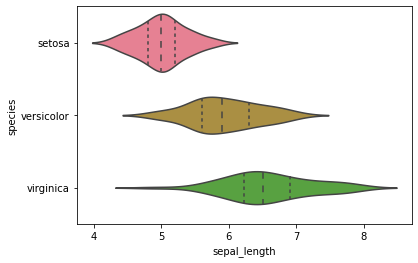

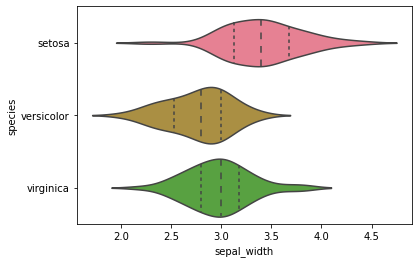

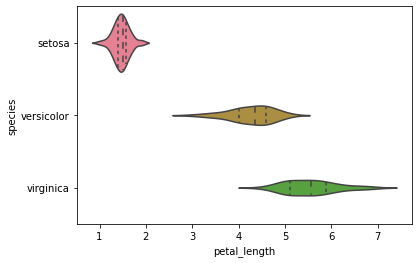

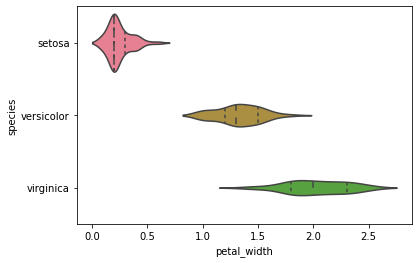

In [78]:
#VISUALIZATION
#violin plot
sns.violinplot(y='species', x='sepal_length', data=iris_df, inner='quartile')
plt.show()
sns.violinplot(y='species', x='sepal_width', data=iris_df, inner='quartile')
plt.show()
sns.violinplot(y='species', x='petal_length', data=iris_df, inner='quartile')
plt.show()
sns.violinplot(y='species', x='petal_width', data=iris_df, inner='quartile')
plt.show()

The above-plotted violin plot says that Iris-Setosa class is having a smaller petal length and petal width compared to other class.

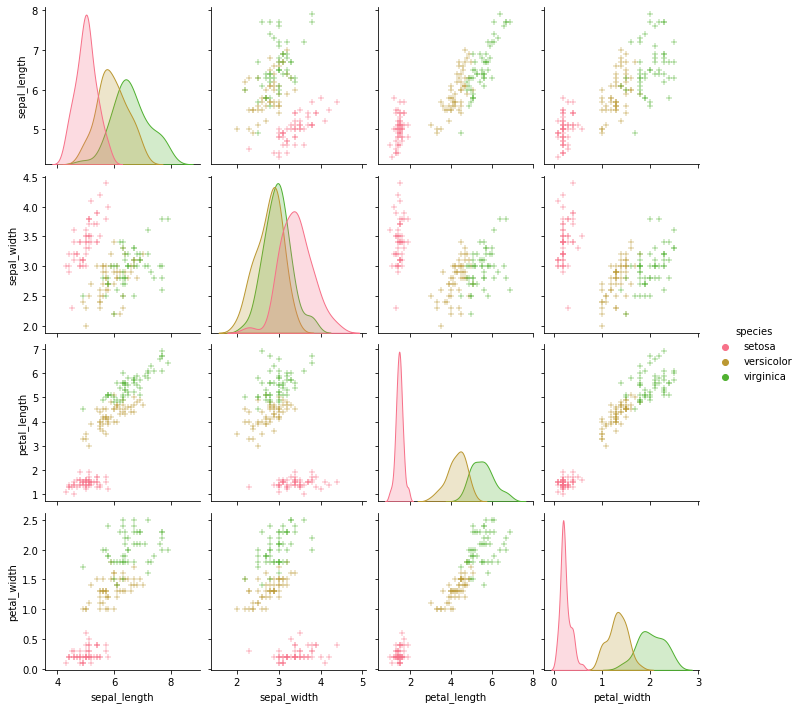

In [80]:
#PAIRPLOT
sns.pairplot(iris_df, hue='species', markers='+')
plt.show()

we can see that Iris-Setosa is separated from both other species in all the features.

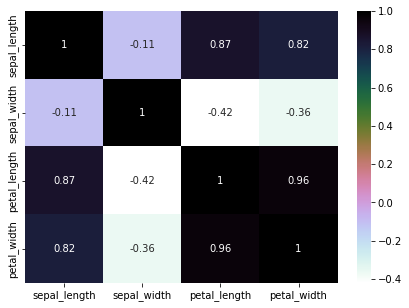

In [81]:
#HeatmapPlotting the heatmap to check the correlation.
#dataset.corr() is used to find the pairwise correlation of all columns in the dataframe.
plt.figure(figsize=(7,5))
sns.heatmap(iris_df.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [96]:
# Model Building- part 1
#X is having all the dependent variables.
#Y is having an independent variable (here in this case ‘class’ is an independent variable).
X = iris_df.drop(['species'], axis=1)
y = iris_df['species']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (150, 4) | y shape: (150,) 


In [84]:
# Train Test split
#Splitting our dataset into train and test using train_test_split(), 
#what we are doing here is taking 80% of data to train our model, and 20% that we will hold back as a validation dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [93]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [97]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [92]:
#Model Creation
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))
# evaluate each model in turn
results = []
model_names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
model_names.append(name)
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

SVC: 0.983333 (0.033333)


In [90]:
#Model Building- part 2
model = SVC(gamma='auto')
model.fit(X_train, y_train)
prediction = model.predict(X_test)
#Printing out the classification report using
#classification_report(y_test, prediction).
print(f'Test Accuracy: {accuracy_score(y_test, prediction)}')
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

Test Accuracy: 0.9666666666666667
Classification Report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

